In [1]:
# --- 1. Import Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 2. Load and Prepare Data ---
# Load the dataset from the CSV file
df = pd.read_csv('heart.csv')

# Separate the data into features (X) and the target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# --- 3. Split Data into Training and Testing Sets ---
# We'll use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Scale the Features ---
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# To prevent warnings, it's good practice to convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# --- 5. Train the Machine Learning Models ---
# Model 1: Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Model 2: Random Forest Classifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(X_train_scaled, y_train)

# --- 6. Evaluate the Models ---
# Make predictions on the test data
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rand_forest = rand_forest.predict(X_test_scaled)

# Print the evaluation results for Logistic Regression
print("--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Print the evaluation results for Random Forest
print("\n\n--- Random Forest Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rand_forest):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rand_forest))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rand_forest))

--- Logistic Regression Model Evaluation ---
Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


Confusion Matrix:
[[73 29]
 [13 90]]


--- Random Forest Model Evaluation ---
Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix:
[[102   0]
 [  3 100]]


In [3]:
from sklearn.model_selection import GridSearchCV

# Define the parameters to test for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Create the GridSearch object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')

# Fit it to your data
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rand_forest = grid_search.best_estimator_
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [7]:
 pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
# You may need to install it first: pip install xgboost
import xgboost as xgb

# Create and train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

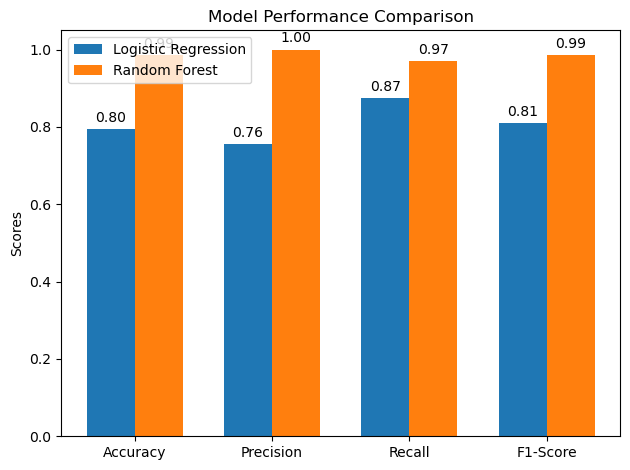

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# --- Create a performance comparison chart ---

# Get metrics for Logistic Regression
precision_lr = precision_score(y_test, y_pred_log_reg)
recall_lr = recall_score(y_test, y_pred_log_reg)
f1_lr = f1_score(y_test, y_pred_log_reg)
accuracy_lr = accuracy_score(y_test, y_pred_log_reg)

# Get metrics for Random Forest
precision_rf = precision_score(y_test, y_pred_rand_forest)
recall_rf = recall_score(y_test, y_pred_rand_forest)
f1_rf = f1_score(y_test, y_pred_rand_forest)
accuracy_rf = accuracy_score(y_test, y_pred_rand_forest)

# Set up the data for plotting
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_scores = [accuracy_lr, precision_lr, recall_lr, f1_lr]
rf_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_scores, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

# Add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

fig.tight_layout()
plt.show()

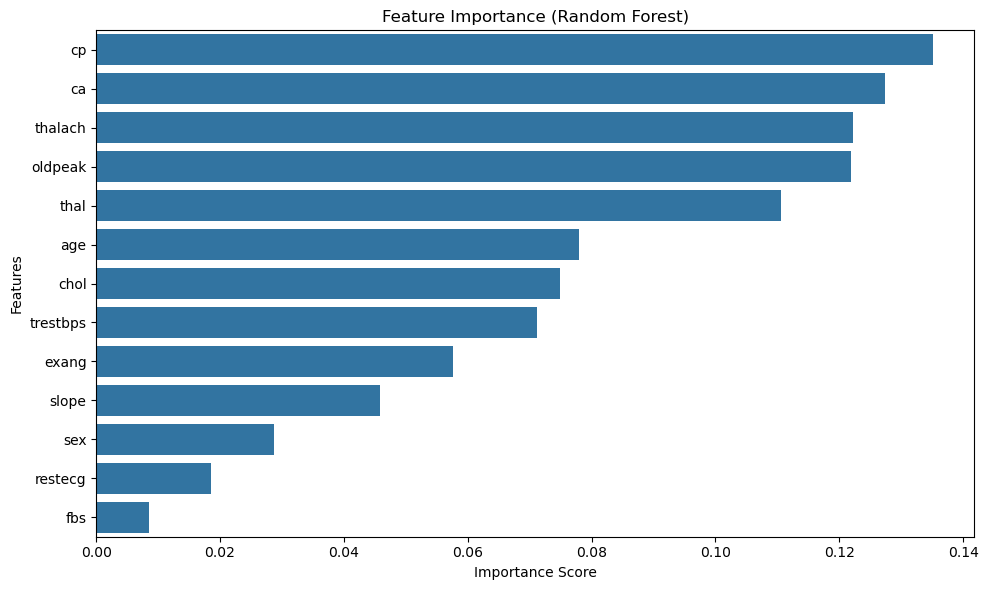

In [10]:
import seaborn as sns

# --- Create a feature importance chart ---

# Get feature importances from the Random Forest model
importances = rand_forest.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

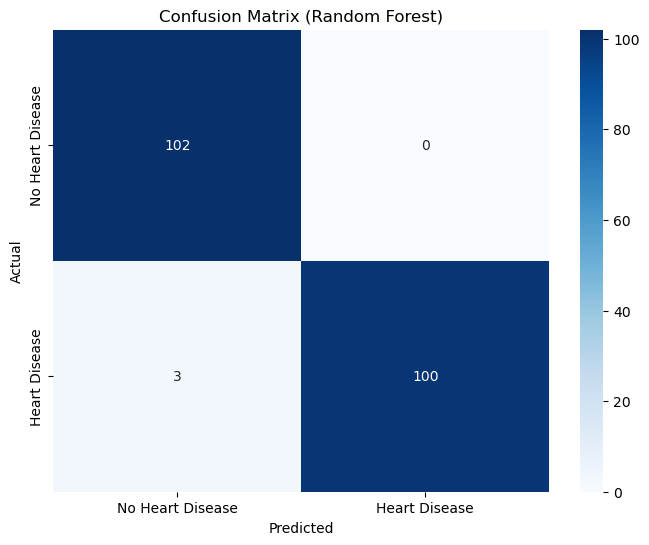

In [11]:
# --- Create a Confusion Matrix Heatmap ---

# Calculate the confusion matrix for the Random Forest model
cm = confusion_matrix(y_test, y_pred_rand_forest)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [12]:
import joblib

# Save the Random Forest model to a file
joblib.dump(rand_forest, 'heart_disease_model.joblib')

# IMPORTANT: Also save the scaler
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [13]:
scaler = joblib.load('scaler.joblib')